# Patchwork builder demo

This demo presents how patchwork builder can be used to easily stitch images from different stripes, in many versions and with multiple channels.

## Demo data

Demo data is defived from image below

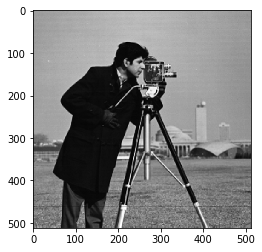

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import data

plt.imshow(data.camera(), cmap='gray')
plt.show()

Image is cut into overlaping stripes and trnsformed to simulate multiple channels and versions.

Channels are represented by mapping pixel values using simple methods like inversion.

Versions are represented by blurring the image (higher version - more blurred image).

Example of split into 4 stripes, with 3 channels and 2 versions is visible below.

Note that consequtive stripes are shifted horizontally in order to make the stitching problem less obvious. 

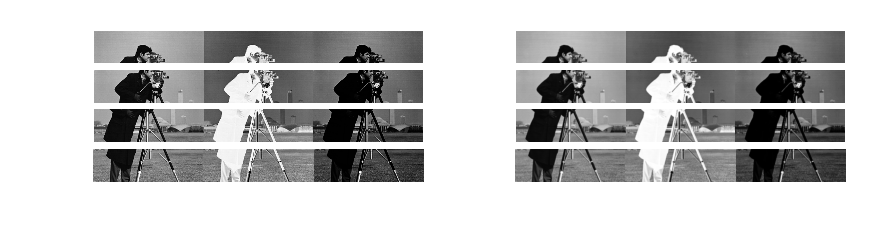

In [2]:
from alpenglow.image_sources.demo import DemoImageSource

stripe_count = 4
version_count = 2
image_source = DemoImageSource(stripe_count=stripe_count, version_count=version_count, 
                               channel_count=3, vertical_shifts=(19, 38, 0))

fig = plt.figure(figsize=(5,1), dpi=200)

for version_id in range(version_count):
    for stripe_id in range(stripe_count):
        ax = fig.add_subplot(stripe_count, version_count, 1 + version_id + version_count * stripe_id)
        ax.imshow(image_source.get_image(stripe_id, version_id), cmap='gray')
        ax.set_axis_off()
plt.show()        



Patchwork builder delegates work connected with finding shift and vertical overlap to a subclass of `MatchingAlgorithm`. Implementation similar to one found in `stitching2.py` is provided as `OldMatchingAlgorithm`. This implementation is parametrized with list of channels and versions which should be taken into consideration while finding a match.

In [3]:
from alpenglow.matching_algorithms.old import OldMatchingAlgorithm
matching_algorithm = OldMatchingAlgorithm([0,], [0,])

print(matching_algorithm.match(image_source.get_stripe(0), image_source.get_stripe(1)))

(50, -19)


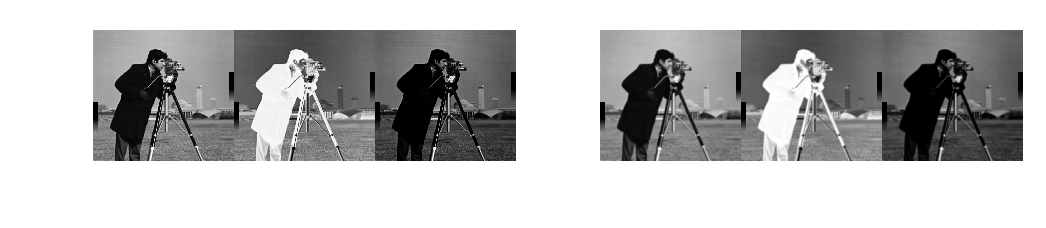

In [4]:
from alpenglow.patchwork_builders.default import PatchworkBuilder

builder = PatchworkBuilder(matching_algorithm)
for stripe_id in range(stripe_count):
    builder.stitch(image_source.get_stripe(stripe_id))
    
patchwork = builder.get()
fig = plt.figure(figsize=(6, 8), dpi=200)
for version_id in range(version_count):
    ax = fig.add_subplot(1, version_count, 1 + version_id)
    ax.imshow(patchwork.get_image(version_id), cmap='gray')
    ax.set_axis_off()

plt.show()